In [1]:
import os
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import geopandas.datasets as geodatasets
from matplotlib.colors import ListedColormap

In [2]:

# Define the file path
file_path = '../data/phila/labeled_inspections_with_reviews.csv'
shapefile = '../data/phila/PaCounty2023_10/PaCounty2023_10.shp'

# Open data
try:
    data = pd.read_csv(file_path)
    print("Data successfully loaded.")
except FileNotFoundError:
    print(f"File '{file_path}' not found.")
except Exception as e:
    print("An error occurred:", e)

Data successfully loaded.


In [3]:
data.columns

Index(['Unnamed: 0', 'Organization Name', 'Active Indicator',
       'Public Facility Name', 'Program Group Type', 'Address', 'City',
       'County Name', 'Zip Code', 'State', 'Inspection Date',
       'Inspection Reason Type', 'Overall Compliance',
       'Georeferenced Latitude and Longitude', 'business_id', 'name',
       'address', 'city', 'state', 'postal_code', 'latitude', 'longitude',
       'stars', 'review_count', 'is_open', 'attributes', 'categories', 'hours',
       'prev_date', 'prev_date_with_nulls', 'reviews', 'ratings', 'n_reviews',
       'avg_rating'],
      dtype='object')

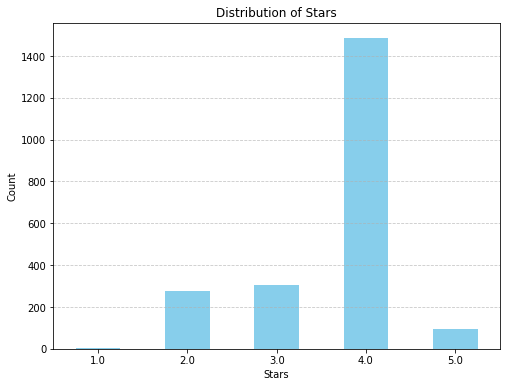

In [17]:
# Create a bar plot of the distribution of stars
plt.figure(figsize=(8, 6))
data['avg_stars'] = data['stars'].round()
data['avg_stars'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Stars')
plt.xlabel('Stars')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

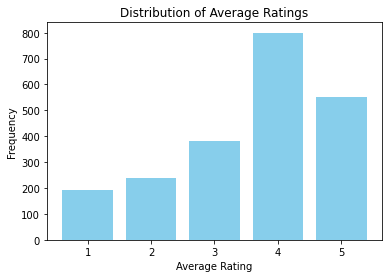

In [14]:
# Round the average ratings to the nearest whole number
data['rounded_avg_rating'] = data['avg_rating'].round()

# Count the occurrences of each rounded rating
rating_counts = data['rounded_avg_rating'].value_counts().sort_index()

# Plot the bar plot
plt.bar(rating_counts.index, rating_counts.values, color='skyblue')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Average Ratings')
plt.xticks(range(1, 6))  # Set x-axis ticks to show ratings from 1 to 5
plt.show()

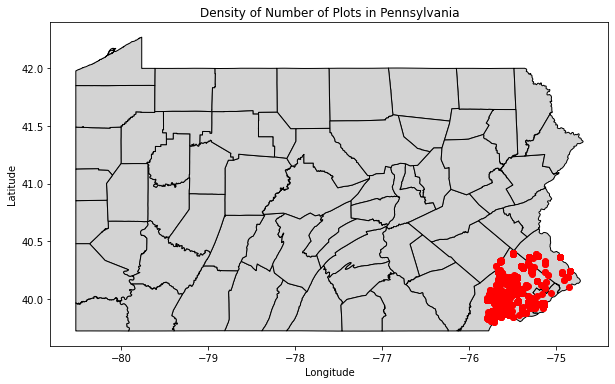

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the Pennsylvania shapefile
pennsylvania = gpd.read_file('../data/phila/PaCounty2023_10/PaCounty2023_10.shp')

# Reproject the Pennsylvania shapefile to match the coordinate system of the data points
pennsylvania = pennsylvania.to_crs(epsg=4326)  # Assuming your data points are in EPSG:4326

# Plot the Pennsylvania
pennsylvania.plot(figsize=(10, 10), color='lightgrey', edgecolor='black')

# Plot the data points
plt.scatter(data['longitude'], data['latitude'], color='red', label='Data Points')

plt.title('Density of Number of Plots in Pennsylvania')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()


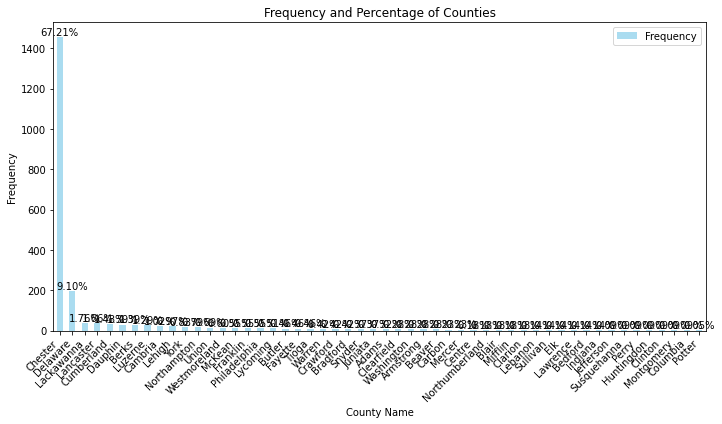

In [6]:
# Count the frequency of each county name
county_freq = data['County Name'].value_counts()

# Compute the percentage of observations for each county
total_count = len(data)
county_percentage = (county_freq / total_count) * 100

# Create a DataFrame to store both frequency and percentage
county_stats = pd.DataFrame({'Frequency': county_freq, 'Percentage': county_percentage})

# Plot the bar plot
plt.figure(figsize=(10, 6))
county_stats['Frequency'].plot(kind='bar', color='skyblue', alpha=0.7, label='Frequency')
plt.ylabel('Frequency')
plt.xlabel('County Name')
plt.title('Frequency and Percentage of Counties')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Add percentage text above each bar
for i, freq in enumerate(county_stats['Frequency']):
    percentage = county_stats['Percentage'][i]
    plt.text(i, freq + 0.5, f'{percentage:.2f}%', ha='center', va='bottom')

plt.legend()
plt.show()

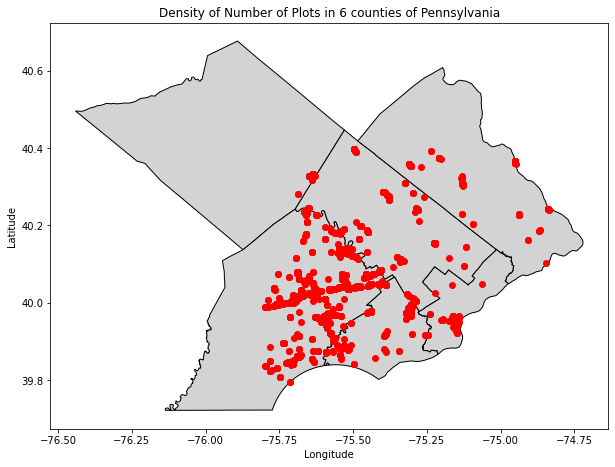

In [67]:
# Counties of interest
counties_of_interest = ['CHESTER', 'DELAWARE', 'MONTGOMERY', 'BUCKS', 'PHILADELPHIA', 'BERKS']

# Load the Pennsylvania shapefile
pennsylvania = gpd.read_file('../data/phila/PaCounty2023_10/PaCounty2023_10.shp')

# Reproject the Pennsylvania shapefile to match the coordinate system of the data points
pennsylvania = pennsylvania.to_crs(epsg=4326) 

# Filter the Pennsylvania shapefile to include only the counties of interest
pennsylvania_filtered = pennsylvania[pennsylvania['COUNTY_NAM'].isin(counties_of_interest)]

# Filter the Pennsylvania shapefile to include only the counties of interest
pennsylvania_filtered = pennsylvania[pennsylvania['COUNTY_NAM'].isin(counties_of_interest)]

# Plot the Pennsylvania counties of interest
pennsylvania_filtered.plot(figsize=(10, 10), color='lightgrey', edgecolor='black')

# Plot the data points
plt.scatter(data['longitude'], data['latitude'], color='red', label='Data Points')

plt.title('Density of Number of Plots in 6 counties of Pennsylvania')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [12]:
data['stars'].unique()

array([2.5, 4. , 3.5, 5. , 1.5, 3. , 2. , 4.5, 1. ])

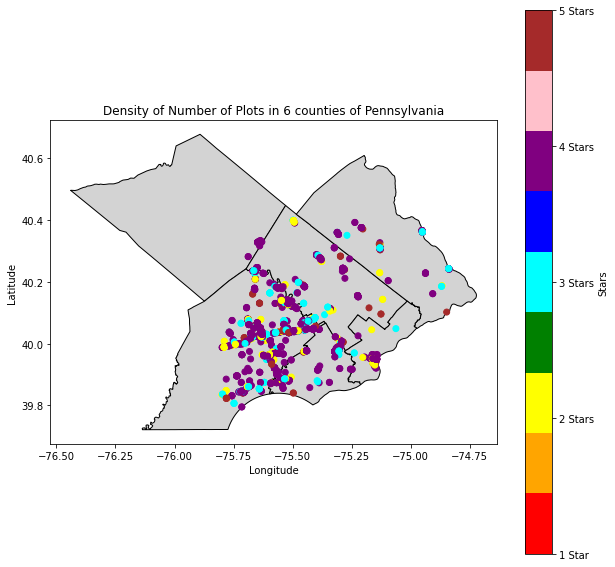

In [18]:
# Counties of interest
counties_of_interest = ['CHESTER', 'DELAWARE', 'MONTGOMERY', 'BUCKS', 'PHILADELPHIA', 'BERKS']

# Load the Pennsylvania shapefile
pennsylvania = gpd.read_file('../data/phila/PaCounty2023_10/PaCounty2023_10.shp')

# Reproject the Pennsylvania shapefile to match the coordinate system of the data points
pennsylvania = pennsylvania.to_crs(epsg=4326) 

# Filter the Pennsylvania shapefile to include only the counties of interest
pennsylvania_filtered = pennsylvania[pennsylvania['COUNTY_NAM'].isin(counties_of_interest)]

# Plot the Pennsylvania counties of interest
ax = pennsylvania_filtered.plot(figsize=(10, 10), color='lightgrey', edgecolor='black')

# Plot the data points with different colors based on the 'stars' column
stars_values = [1.0,  2.0,  3.0,  4.0,  5.0]
stars_labels = ['1 Star',  '2 Stars',  '3 Stars',  '4 Stars',  '5 Stars']
cmap = ListedColormap(['red', 'orange', 'yellow', 'green', 'cyan', 'blue', 'purple', 'pink', 'brown'])
scatter = ax.scatter(data['longitude'], data['latitude'], c=data['avg_stars'], cmap=cmap, label='Data Points')

# Add a discrete legend
cbar = plt.colorbar(scatter, ticks=stars_values)
cbar.ax.set_yticklabels(stars_labels)
cbar.set_label('Stars')

plt.title('Density of Number of Plots in 6 counties of Pennsylvania')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


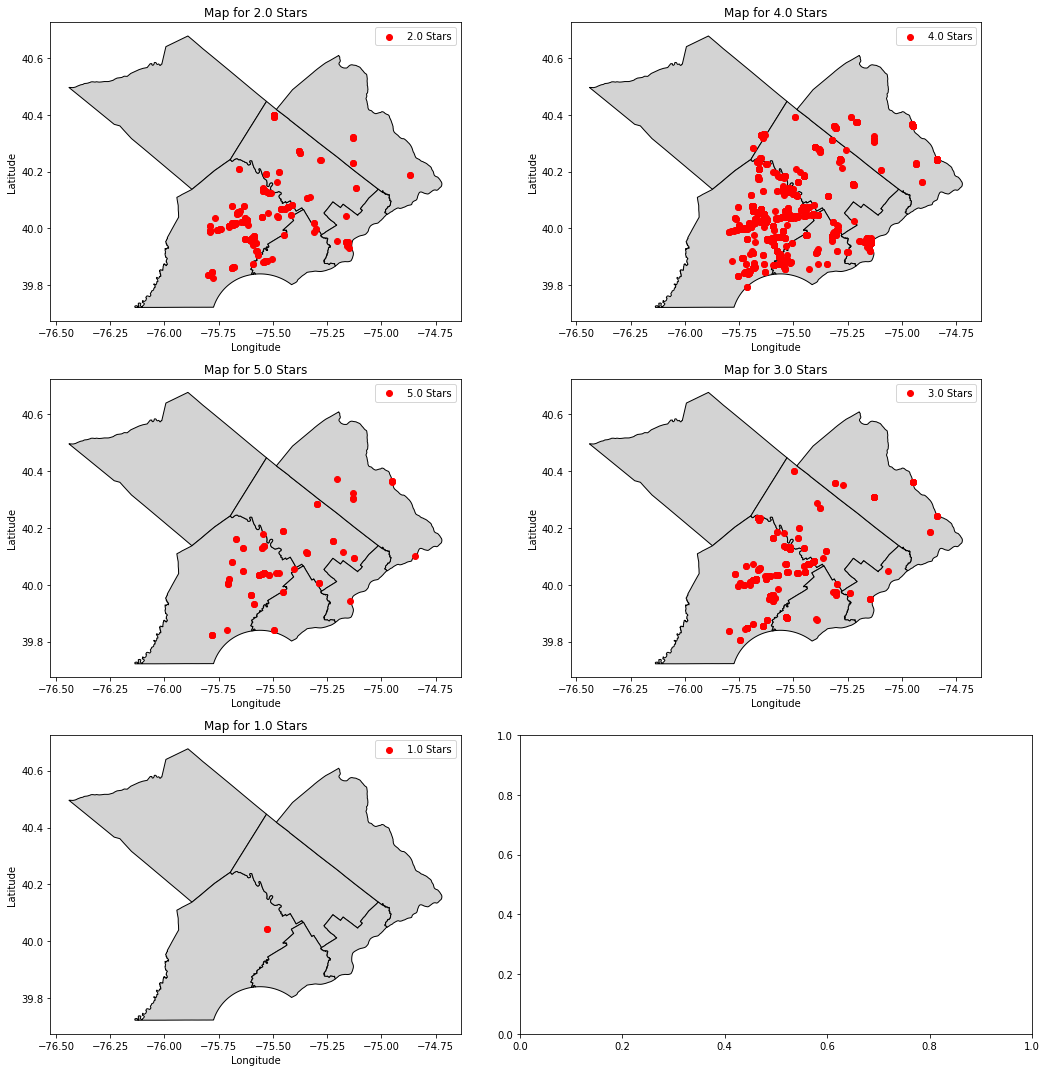

In [19]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the Pennsylvania shapefile
pennsylvania = gpd.read_file('../data/phila/PaCounty2023_10/PaCounty2023_10.shp')

# Reproject the Pennsylvania shapefile to match the coordinate system of the data points
pennsylvania = pennsylvania.to_crs(epsg=4326)

# Counties of interest
counties_of_interest = ['CHESTER', 'DELAWARE', 'MONTGOMERY', 'BUCKS', 'PHILADELPHIA', 'BERKS']

# Define the unique values of the 'stars' column
unique_stars = data['avg_stars'].unique()

# Create subplots
num_rows = len(unique_stars) // 2 + (len(unique_stars) % 2)
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5*num_rows))

# Iterate over the unique values and create a map for each value
for i, star in enumerate(unique_stars):
    # Filter the data for the current star value
    filtered_data = data[data['avg_stars'] == star]
    
    # Plot the Pennsylvania counties of interest
    ax = pennsylvania[pennsylvania['COUNTY_NAM'].isin(counties_of_interest)].plot(ax=axes[i // 2, i % 2], color='lightgrey', edgecolor='black')
    
    # Plot the data points for the current star value
    ax.scatter(filtered_data['longitude'], filtered_data['latitude'], color='red', label=f'{star} Stars')
    
    # Set title and labels
    ax.set_title(f'Map for {star} Stars')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    
    # Show legend
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

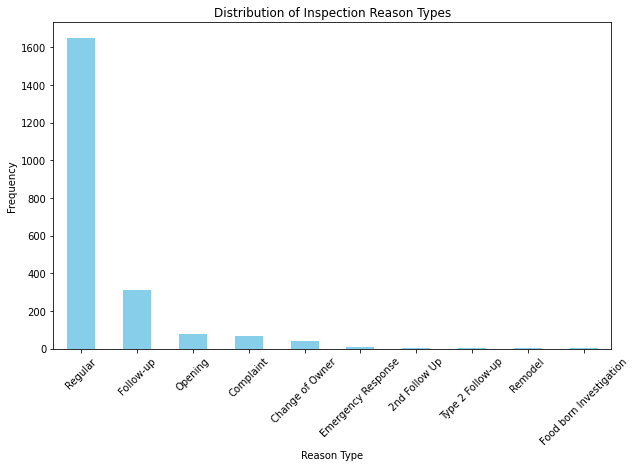

In [20]:
# Count the occurrences of each category in the 'Inspection Reason Type' column
reason_counts = data['Inspection Reason Type'].value_counts()

# Plot the bar plot
reason_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')

# Set the title and labels
plt.title('Distribution of Inspection Reason Types')
plt.xlabel('Reason Type')
plt.ylabel('Frequency')

# Rotate the x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [22]:
# Compute the contingency table
contingency_table = pd.crosstab(data['Inspection Reason Type'], data['Overall Compliance'])

# Compute the total number of inspections per reason type
total_inspections = contingency_table.sum(axis=1)

# Compute the number of 'Yes' and 'No' for each reason type
yes_counts = contingency_table['Yes']
no_counts = contingency_table['No']

# Compute the percentages
yes_percentages = (yes_counts / total_inspections) * 100
no_percentages = (no_counts / total_inspections) * 100

# Create a new DataFrame to store the results
result_df = pd.DataFrame({
    'Total Inspections': total_inspections,
    'Yes': yes_counts,
    'No': no_counts,
    '% Yes': yes_percentages,
    '% No': no_percentages
})

# Order result_df by total_inspections
result_df_sorted = result_df.sort_values(by='Total Inspections', ascending=False)

# Print the result
print(result_df_sorted)

                         Total Inspections   Yes   No       % Yes        % No
Inspection Reason Type                                                       
Regular                               1649  1237  412   75.015161   24.984839
Follow-up                              311   275   36   88.424437   11.575563
Opening                                 76    73    3   96.052632    3.947368
Complaint                               69    57   12   82.608696   17.391304
Change of Owner                         40    31    9   77.500000   22.500000
Emergency Response                      10     8    2   80.000000   20.000000
2nd Follow Up                            6     6    0  100.000000    0.000000
Type 2 Follow-up                         2     2    0  100.000000    0.000000
Food born Investigation                  1     0    1    0.000000  100.000000
Remodel                                  1     1    0  100.000000    0.000000


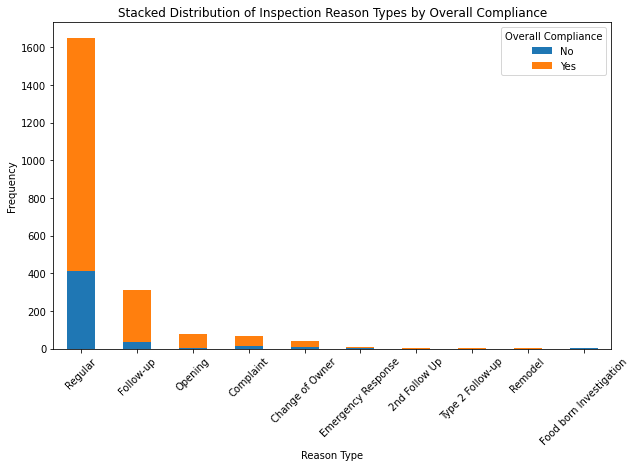

In [22]:
# Create a contingency table using crosstab
contingency_table = pd.crosstab(data['Inspection Reason Type'], data['Overall Compliance'])

# Compute the frequency of each 'Inspection Reason Type' category and sort the contingency table by these frequencies
reason_counts = data['Inspection Reason Type'].value_counts()
contingency_table = contingency_table.loc[reason_counts.index]

# Plot the stacked bar plot
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set the title and labels
plt.title('Stacked Distribution of Inspection Reason Types by Overall Compliance')
plt.xlabel('Reason Type')
plt.ylabel('Frequency')

# Rotate the x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()

